In [40]:
# Import dependencies for data handling, analysis, and visualization
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns


In [41]:
# Set up Matplotlib for better visual appeal
plt.style.use('ggplot')

In [42]:
# Fetch stock data for analysis
ticker = "AAPL"  # Example ticker
data = yf.download(ticker, start="2020-01-01", end="2024-01-01")
data.reset_index(inplace=True)  # Reset index to use Date as a column


[*********************100%***********************]  1 of 1 completed


In [43]:
# Display the first few rows
print("First few rows of data:")
print(data.head())

First few rows of data:
Price        Date  Adj Close      Close       High        Low       Open  \
Ticker                  AAPL       AAPL       AAPL       AAPL       AAPL   
0      2020-01-02  72.796021  75.087502  75.150002  73.797501  74.059998   
1      2020-01-03  72.088280  74.357498  75.144997  74.125000  74.287498   
2      2020-01-06  72.662704  74.949997  74.989998  73.187500  73.447502   
3      2020-01-07  72.320976  74.597504  75.224998  74.370003  74.959999   
4      2020-01-08  73.484360  75.797501  76.110001  74.290001  74.290001   

Price      Volume  
Ticker       AAPL  
0       135480400  
1       146322800  
2       118387200  
3       108872000  
4       132079200  


In [44]:
# Display basic information about the dataset
print("\nData Info:")
print(data.info())



Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006 entries, 0 to 1005
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   (Date, )           1006 non-null   datetime64[ns]
 1   (Adj Close, AAPL)  1006 non-null   float64       
 2   (Close, AAPL)      1006 non-null   float64       
 3   (High, AAPL)       1006 non-null   float64       
 4   (Low, AAPL)        1006 non-null   float64       
 5   (Open, AAPL)       1006 non-null   float64       
 6   (Volume, AAPL)     1006 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 55.1 KB
None


In [45]:
# Generate summary statistics for numerical columns
print("\nSummary Statistics:")
print(data.describe())


Summary Statistics:
Price                            Date    Adj Close        Close         High  \
Ticker                                        AAPL         AAPL         AAPL   
count                            1006  1006.000000  1006.000000  1006.000000   
mean    2021-12-30 11:57:08.230616320   138.711616   140.808131   142.321389   
min               2020-01-02 00:00:00    54.509758    56.092499    57.125000   
25%               2020-12-30 06:00:00   121.054741   123.592501   125.030003   
50%               2021-12-29 12:00:00   143.596527   145.860001   147.264999   
75%               2022-12-28 18:00:00   164.086536   166.214996   168.147503   
max               2023-12-29 00:00:00   197.144180   198.110001   199.619995   
std                               NaN    33.540053    33.313857    33.430571   

Price           Low         Open        Volume  
Ticker         AAPL         AAPL          AAPL  
count   1006.000000  1006.000000  1.006000e+03  
mean     139.143536   140.67550

In [46]:
# Check for missing values to ensure data integrity
print("\nMissing Values:")
print(data.isnull().sum())



Missing Values:
Price      Ticker
Date                 0
Adj Close  AAPL      0
Close      AAPL      0
High       AAPL      0
Low        AAPL      0
Open       AAPL      0
Volume     AAPL      0
dtype: int64


In [47]:
# Create a new column for daily returns to analyze volatility
data['Daily Return'] = data['Close'].pct_change()


In [48]:
# Add technical indicators for trend and momentum analysis

In [49]:

# 1. Simple Moving Averages (SMA)
data['SMA_50'] = data['Close'].rolling(window=50).mean()  # 50-day SMA
data['SMA_200'] = data['Close'].rolling(window=200).mean()  # 200-day SMA


In [50]:
# 2. Bollinger Bands for volatility analysis
data['Rolling Mean'] = data['Close'].rolling(window=20).mean()  # 20-day rolling mean
data['Rolling Std'] = data['Close'].rolling(window=20).std()   # 20-day rolling standard deviation

# Calculate upper and lower bands
data['Upper Band'] = data['Rolling Mean'] + 2 * data['Rolling Std']
data['Lower Band'] = data['Rolling Mean'] - 2 * data['Rolling Std']



In [51]:
# 3. Relative Strength Index (RSI) to measure overbought/oversold conditions
def calculate_rsi(data, window=14):
    """
    Function to calculate the Relative Strength Index (RSI).
    RSI is a momentum oscillator that measures the speed and change of price movements.
    """
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

data['RSI'] = calculate_rsi(data)


In [52]:
# 4. Log Returns for better handling of compounded growth rates
data['Log Return'] = np.log(data['Close'] / data['Close'].shift(1))


In [53]:
# 5. Volatility calculations 
# Calculate rolling volatility (standard deviation of daily returns)
data['Volatility_20'] = data['Daily Return'].rolling(window=20).std() * np.sqrt(252)  # Annualized volatility
data['Volatility_50'] = data['Daily Return'].rolling(window=50).std() * np.sqrt(252)


In [54]:
# 6. Risk metricts 
# Calculate Sharpe Ratio
# Assume risk-free rate is 2% (0.02 in decimal form)
risk_free_rate = 0.02
data['Excess Return'] = data['Daily Return'] - (risk_free_rate / 252)  # Daily risk-free rate
sharpe_ratio = data['Excess Return'].mean() / data['Excess Return'].std() * np.sqrt(252)  # Annualized Sharpe ratio
print(f"Sharpe Ratio for {ticker}: {sharpe_ratio:.2f}")


Sharpe Ratio for AAPL: 0.81


In [55]:
# Visualizations to gain insights from the data

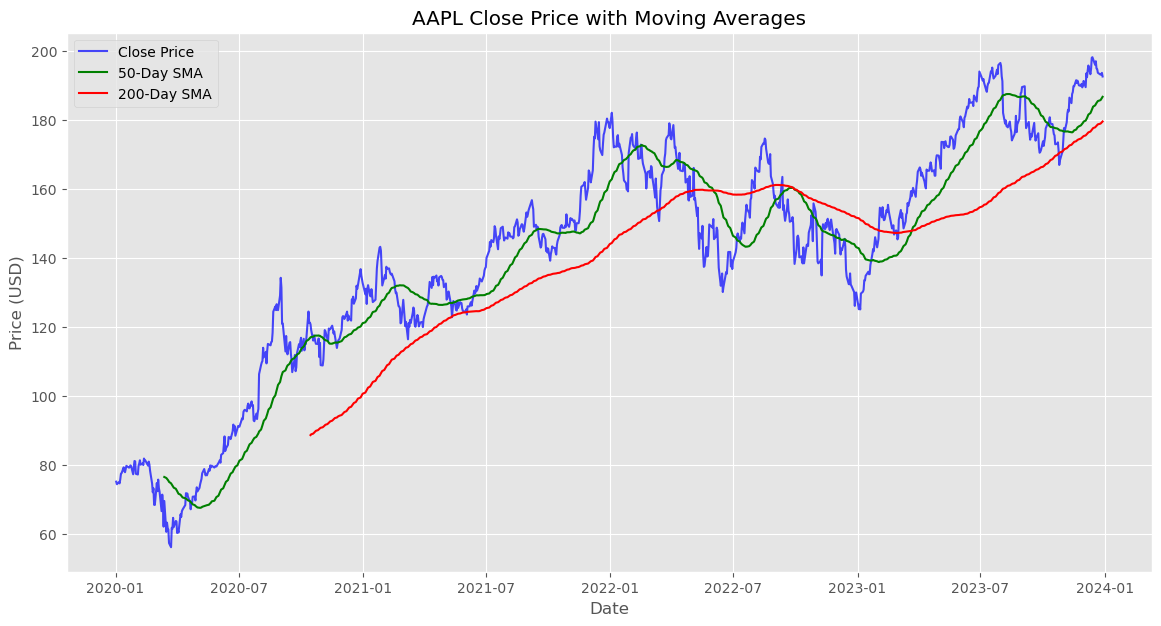

In [56]:
# 1. Plot the closing price with moving averages to identify trends
plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['Close'], label='Close Price', color='blue', alpha=0.7)
plt.plot(data['Date'], data['SMA_50'], label='50-Day SMA', color='green')
plt.plot(data['Date'], data['SMA_200'], label='200-Day SMA', color='red')
plt.title(f'{ticker} Close Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

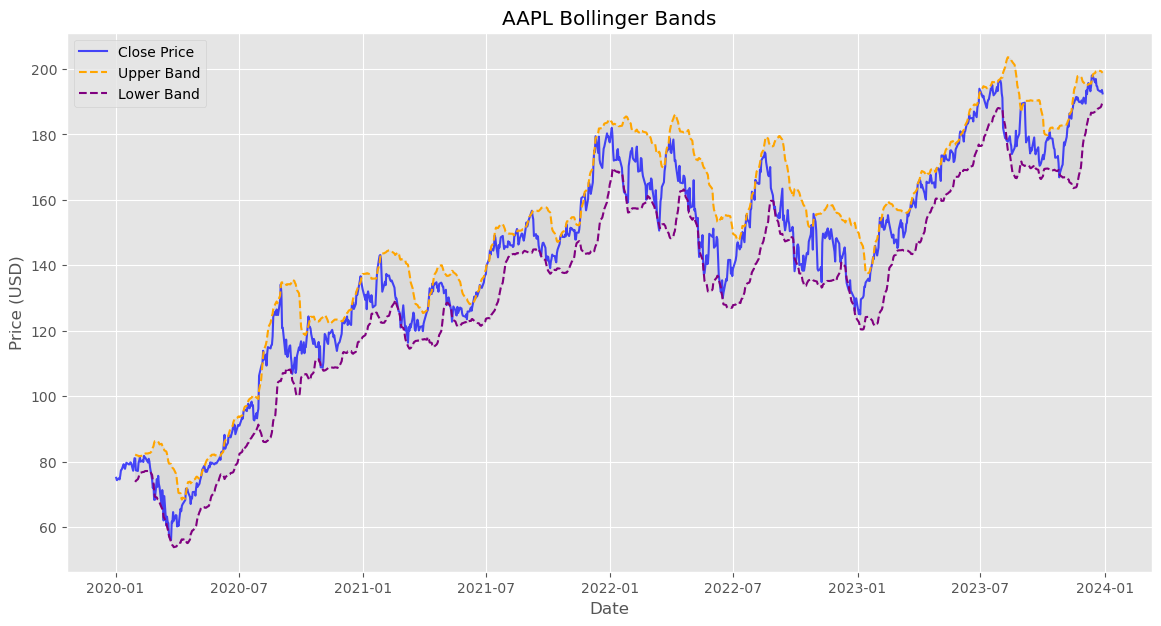

In [57]:
# 2. Plot Bollinger Bands to visualize volatility
plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['Close'], label='Close Price', color='blue', alpha=0.7)
plt.plot(data['Date'], data['Upper Band'], label='Upper Band', color='orange', linestyle='--')
plt.plot(data['Date'], data['Lower Band'], label='Lower Band', color='purple', linestyle='--')
plt.fill_between(data['Date'], data['Upper Band'], data['Lower Band'], color='gray', alpha=0.1)
plt.title(f'{ticker} Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()


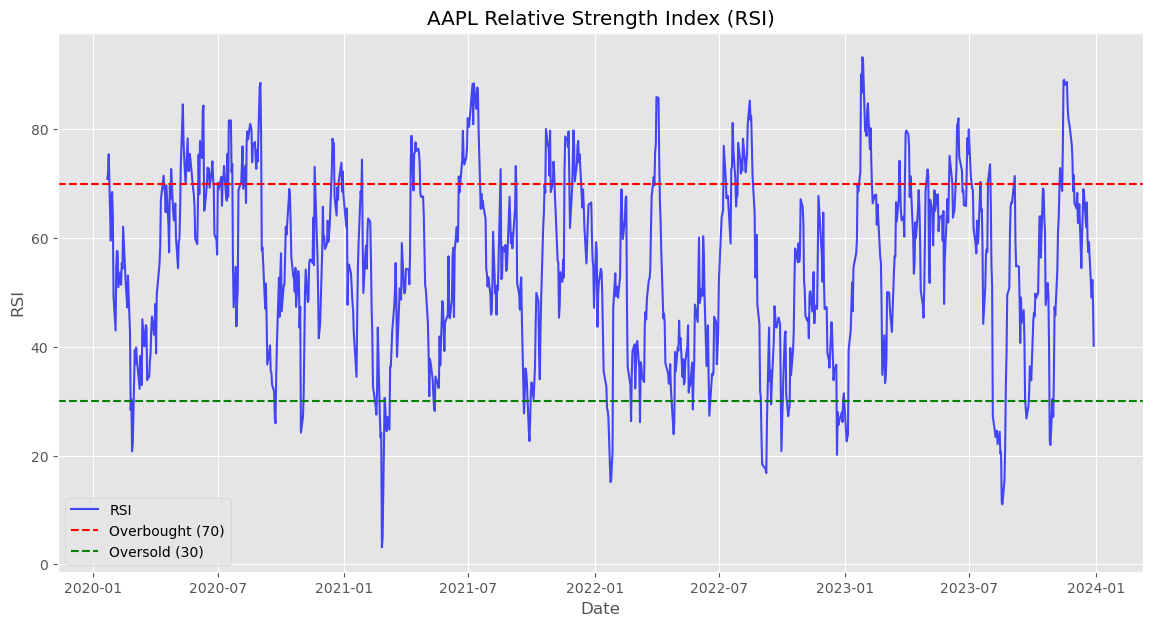

In [58]:
# 3. Plot RSI to identify overbought (above 70) and oversold (below 30) levels
plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['RSI'], label='RSI', color='blue', alpha=0.7)
plt.axhline(70, color='red', linestyle='--', label='Overbought (70)')
plt.axhline(30, color='green', linestyle='--', label='Oversold (30)')
plt.title(f'{ticker} Relative Strength Index (RSI)')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.grid(True)
plt.show()


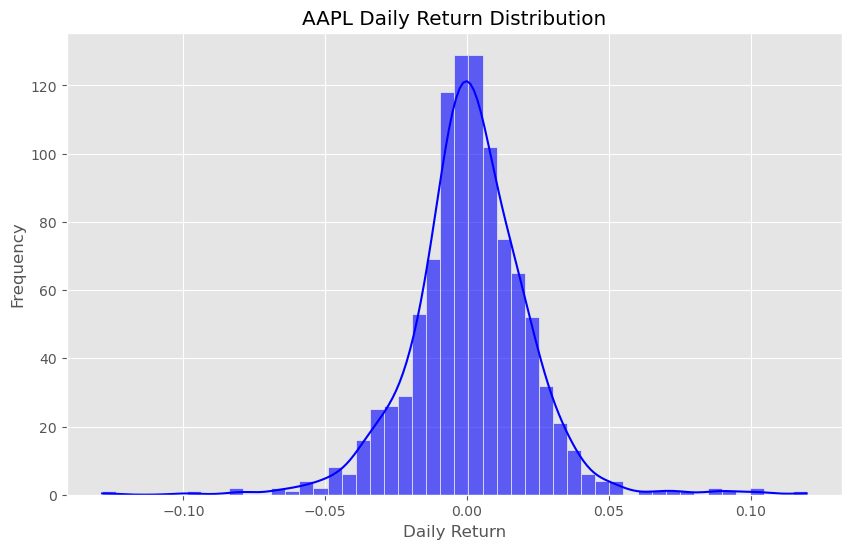

In [59]:
# 4. Plot daily return distribution to analyze return patterns
plt.figure(figsize=(10, 6))
sns.histplot(data['Daily Return'].dropna(), kde=True, bins=50, color='blue', alpha=0.6)
plt.title(f'{ticker} Daily Return Distribution')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

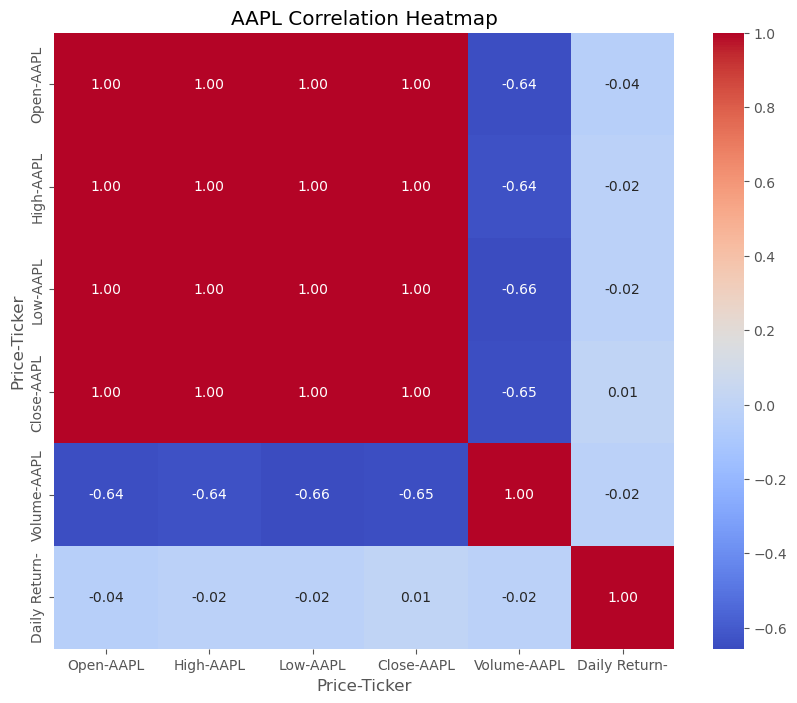

In [60]:
# 5. Correlation heatmap to understand relationships between key variables
correlation_data = data[['Open', 'High', 'Low', 'Close', 'Volume', 'Daily Return']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_data, annot=True, cmap='coolwarm', fmt=".2f")
plt.title(f'{ticker} Correlation Heatmap')
plt.show()


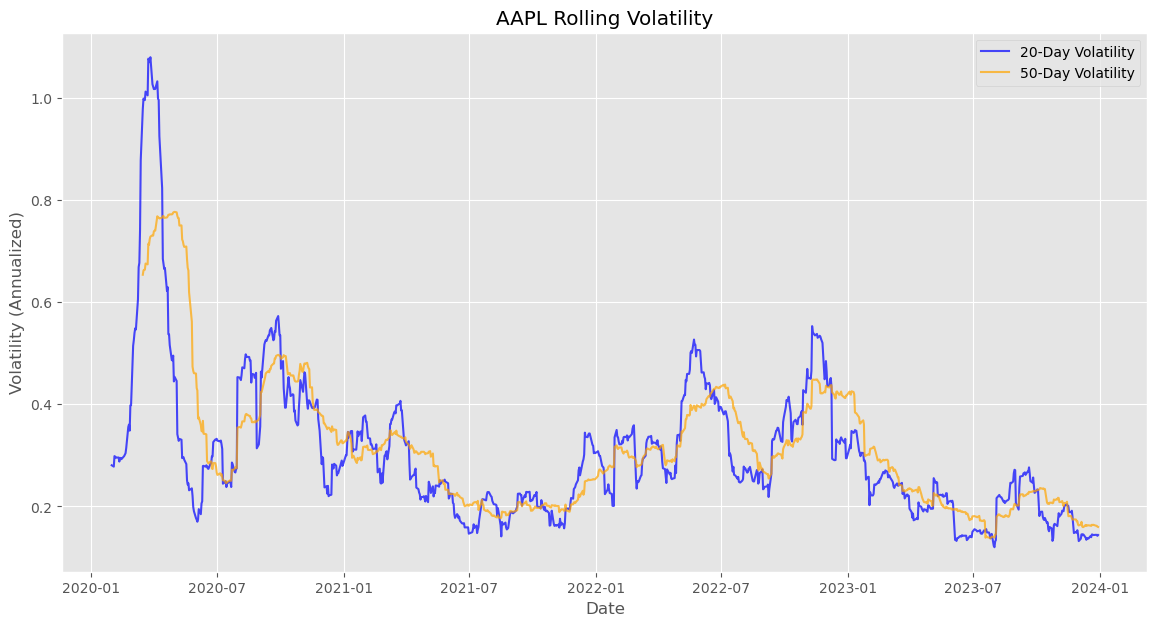

In [26]:
# 6. Plot volatility
plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['Volatility_20'], label='20-Day Volatility', color='blue', alpha=0.7)
plt.plot(data['Date'], data['Volatility_50'], label='50-Day Volatility', color='orange', alpha=0.7)
plt.title(f'{ticker} Rolling Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility (Annualized)')
plt.legend()
plt.grid(True)
plt.show()

[*********************100%***********************]  4 of 4 completed



Portfolio with Maximum Sharpe Ratio:
Annualized Return: 28.26%
Annualized Volatility: 31.49%
Portfolio Weights:
AAPL: 69.20%
MSFT: 0.44%
GOOGL: 5.04%
AMZN: 25.32%


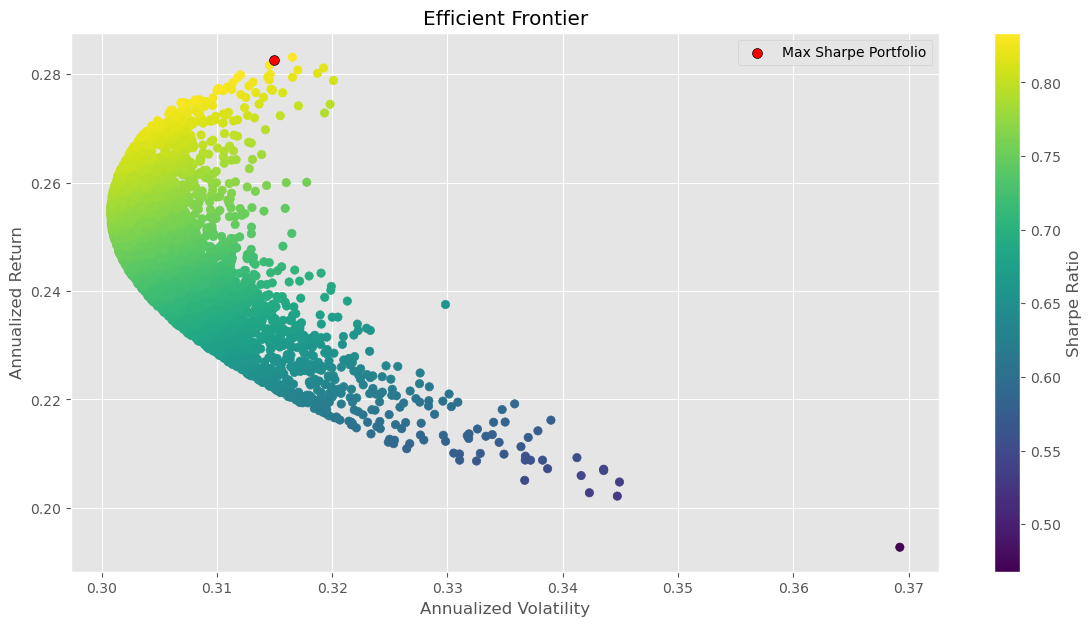

In [28]:
### PORTFOLIO SIMULATION ###
# Define multiple tickers for portfolio simulation
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN']
portfolio_data = yf.download(tickers, start="2020-01-01", end="2024-01-01")['Close']

# Calculate daily returns for all tickers
portfolio_returns = portfolio_data.pct_change()

# Simulate random portfolio weights
np.random.seed(42)
num_portfolios = 5000
all_weights = np.zeros((num_portfolios, len(tickers)))
returns = np.zeros(num_portfolios)
volatilities = np.zeros(num_portfolios)
sharpe_ratios = np.zeros(num_portfolios)

for i in range(num_portfolios):
    # Generate random weights
    weights = np.random.random(len(tickers))
    weights /= np.sum(weights)  # Normalize weights
    all_weights[i, :] = weights

    # Calculate portfolio return
    portfolio_return = np.sum(portfolio_returns.mean() * weights) * 252
    returns[i] = portfolio_return

    # Calculate portfolio volatility
    portfolio_volatility = np.sqrt(
        np.dot(weights.T, np.dot(portfolio_returns.cov() * 252, weights))
    )
    volatilities[i] = portfolio_volatility

    # Calculate Sharpe ratio
    sharpe_ratios[i] = (portfolio_return - risk_free_rate) / portfolio_volatility

# Identify portfolio with max Sharpe ratio
max_sharpe_idx = sharpe_ratios.argmax()
max_sharpe_return = returns[max_sharpe_idx]
max_sharpe_volatility = volatilities[max_sharpe_idx]
max_sharpe_weights = all_weights[max_sharpe_idx]

# Print results for max Sharpe ratio portfolio
print("\nPortfolio with Maximum Sharpe Ratio:")
print(f"Annualized Return: {max_sharpe_return:.2%}")
print(f"Annualized Volatility: {max_sharpe_volatility:.2%}")
print("Portfolio Weights:")
for ticker, weight in zip(tickers, max_sharpe_weights):
    print(f"{ticker}: {weight:.2%}")

# Plot Efficient Frontier
plt.figure(figsize=(14, 7))
plt.scatter(volatilities, returns, c=sharpe_ratios, cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.scatter(max_sharpe_volatility, max_sharpe_return, c='red', s=50, edgecolors='black', label='Max Sharpe Portfolio')
plt.title('Efficient Frontier')
plt.xlabel('Annualized Volatility')
plt.ylabel('Annualized Return')
plt.legend()
plt.grid(True)
plt.show()

[*********************100%***********************]  1 of 1 completed


Data with Rolling Beta saved to AAPL_data_with_beta.csv.


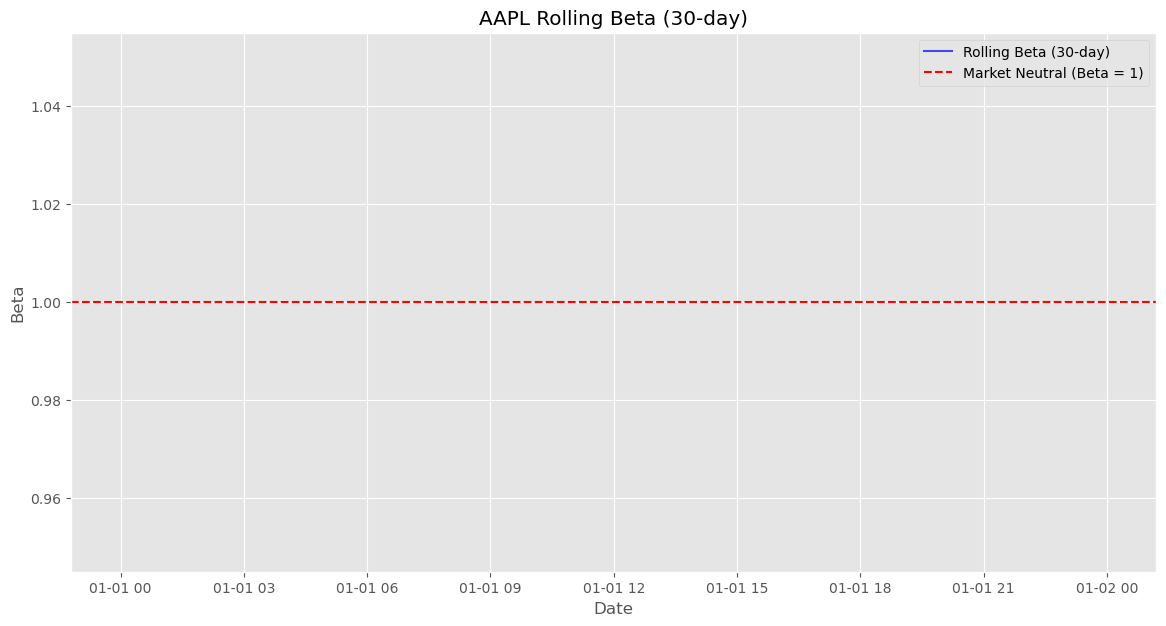

In [63]:
# Function to calculate Rolling Beta
def calculate_beta(stock_returns, market_returns, window=30):
    """
    Calculate rolling beta of the stock with respect to the market.
    
    Beta measures the stock's volatility relative to the market:
    - Beta > 1: Stock is more volatile than the market.
    - Beta < 1: Stock is less volatile than the market.
    
    Parameters:
    stock_returns (pd.Series): Daily returns of the stock.
    market_returns (pd.Series): Daily returns of the market index.
    window (int): Rolling window size (default is 30).
    
    Returns:
    pd.Series: Rolling beta values.
    """
    # Calculate rolling covariance between stock and market returns
    covariance = stock_returns.rolling(window).cov(market_returns)
    # Calculate rolling variance of market returns
    market_variance = market_returns.rolling(window).var()
    # Calculate beta as covariance / market variance
    beta = covariance / market_variance
    return beta

# Fetch market data (e.g., S&P 500 index) for benchmark comparison
market_ticker = "^GSPC"  # S&P 500 ticker symbol
market_data = yf.download(market_ticker, start="2020-01-01", end="2024-01-01")
market_data['Market Return'] = market_data['Close'].pct_change()  # Calculate daily market returns

# Calculate stock returns
data['Stock Return'] = data['Close'].pct_change()  # Calculate daily stock returns

# Align stock and market returns to ensure matching indices
stock_returns = data['Stock Return'].dropna()  # Drop NaN values from stock returns
market_returns = market_data['Market Return'].dropna()  # Drop NaN values from market returns
stock_returns, market_returns = stock_returns.align(market_returns, join='inner')  # Align indices

# Calculate rolling beta using a 30-day rolling window
data['Rolling Beta'] = calculate_beta(stock_returns, market_returns, window=30)

# Save the updated dataset to a CSV file for further analysis
output_file_with_beta = f"{ticker}_data_with_beta.csv"
data.to_csv(output_file_with_beta, index=False)
print(f"\nData with Rolling Beta saved to {output_file_with_beta}.")

# Plot Rolling Beta to visualize how it changes over time
plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['Rolling Beta'], label='Rolling Beta (30-day)', color='blue', alpha=0.7)
plt.axhline(1, color='red', linestyle='--', label='Market Neutral (Beta = 1)')  # Reference line for market-neutral beta
plt.title(f'{ticker} Rolling Beta (30-day)')
plt.xlabel('Date')
plt.ylabel('Beta')
plt.legend()
plt.grid(True)
plt.show()


In [32]:
# Export portfolio weights and metrics for further analysis
portfolio_results = pd.DataFrame({
    "Return": returns,
    "Volatility": volatilities,
    "Sharpe Ratio": sharpe_ratios
})
portfolio_results.to_csv("portfolio_simulation_results.csv", index=False)


In [31]:
# Save the data with indicators to a CSV for further analysis
output_file = f"{ticker}_data_with_indicators.csv"
data.to_csv(output_file, index=False)
print(f"\nData with indicators saved to {output_file}.")



Data with indicators saved to AMZN_data_with_indicators.csv.
